In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display
import os

In [24]:
plt.rc('font', family='serif', size=20)
matplotlib.rc('text', usetex=True)
matplotlib.rc('legend', fontsize=20)
output_path = "D:/Dissetation/overleaf/dissertation/pics"
# output_path = "./output_figures"
os.makedirs(output_path, exist_ok=True)
import math
def floor_to_nearest_10(number):
    return str(math.floor(number / 10) * 10)+'s'
path = "E:/Quanitifying EMG/demog.tsv"
data = pd.read_csv(path, sep='\t')
data['Series'] = data['Series'].replace('Control', 'Asymptomatic')
data['Age Group'] = data['Age at Creation'].apply(floor_to_nearest_10)
sorted_decades = sorted(data['Age Group'].unique())
data['Age Group'] = pd.Categorical(data['Age Group'], categories=sorted_decades, ordered=True)

In [25]:
def plot(data, x, y, hue, filter_column1, filter_values1, filter_column2, filter_values2, output_path):
    # Filter the data based on user selections
    filtered_data = data.copy()
    if filter_column1 and filter_values1:
        filtered_data = filtered_data[filtered_data[filter_column1].isin(filter_values1)]
    if filter_column2 and filter_values2:
        filtered_data = filtered_data[filtered_data[filter_column2].isin(filter_values2)]
    
    # Define the y-axis label
    y_label = f'\\textbf{{{y}}}'
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted figure size for better readability
    hue_unique = filtered_data[hue].nunique()
    palette = sns.color_palette("Blues", hue_unique)  # Use a more vibrant color palette
    
    # Use a barplot or boxplot depending on the data
    if filtered_data[hue].nunique() > 1:
        sns.barplot(
            x=x, y=y, hue=hue, data=filtered_data, errorbar="ci", capsize=0.1,
            err_kws={"color": "0.2", "linewidth": 1}, palette=palette, ax=ax
        )
    else:
        sns.boxplot(
            x=x, y=y, data=filtered_data, palette=palette, ax=ax
        )
    
    # Customize the plot
    plt.xlabel(f'\\textbf{{{x}}}', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels if necessary
    if len(filtered_data[x].unique()) > 5:
        plt.xticks(rotation=45, ha='right')
    
    # Save the plot
    filename = f"barplot_{y.lower()}_by_{hue.lower()}"
    if filter_column1 and filter_values1:
        filename += f"_filtered_by_{filter_column1.lower()}_{'_'.join(map(str, filter_values1)).lower()}"
    if filter_column2 and filter_values2:
        filename += f"_filtered_by_{filter_column2.lower()}_{'_'.join(map(str, filter_values2)).lower()}"
    filename += ".png"
    
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.savefig(os.path.join(output_path, filename), bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()



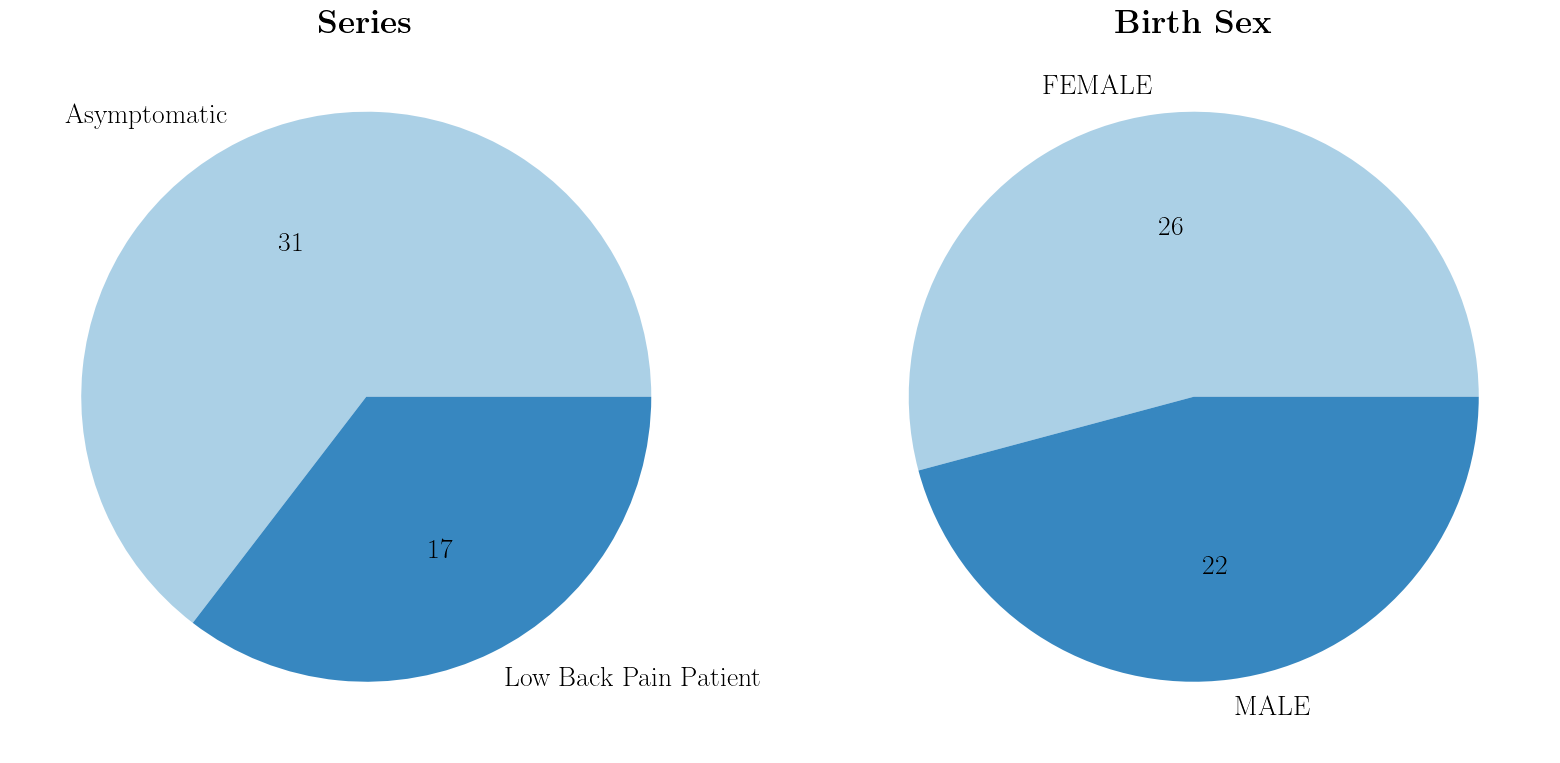

In [26]:
def plot_category_proportions(data, output_path):
    fig, axes = plt.subplots(1, 2, figsize=(16, 9))
    palette = sns.color_palette("Blues", n_colors=2)
    for ax, cat in zip(axes, ['Series', 'Birth Sex']):
        category_counts = data[cat].value_counts()
        category_counts.plot.pie(
            autopct=lambda p: f'{int(round(p * sum(category_counts) / 100))}', 
            ax=ax, 
            colors=palette,
            labels=category_counts.index,
            textprops={'fontfamily': 'serif', 'fontsize': 20}
        )
        ax.set_ylabel("", fontweight='bold', family='serif')
        ax.set_title(f'\\textbf{{{cat}}}')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, "category_proportions.png"), bbox_inches='tight', dpi=300)
    plt.show()
plot_category_proportions(data, output_path)



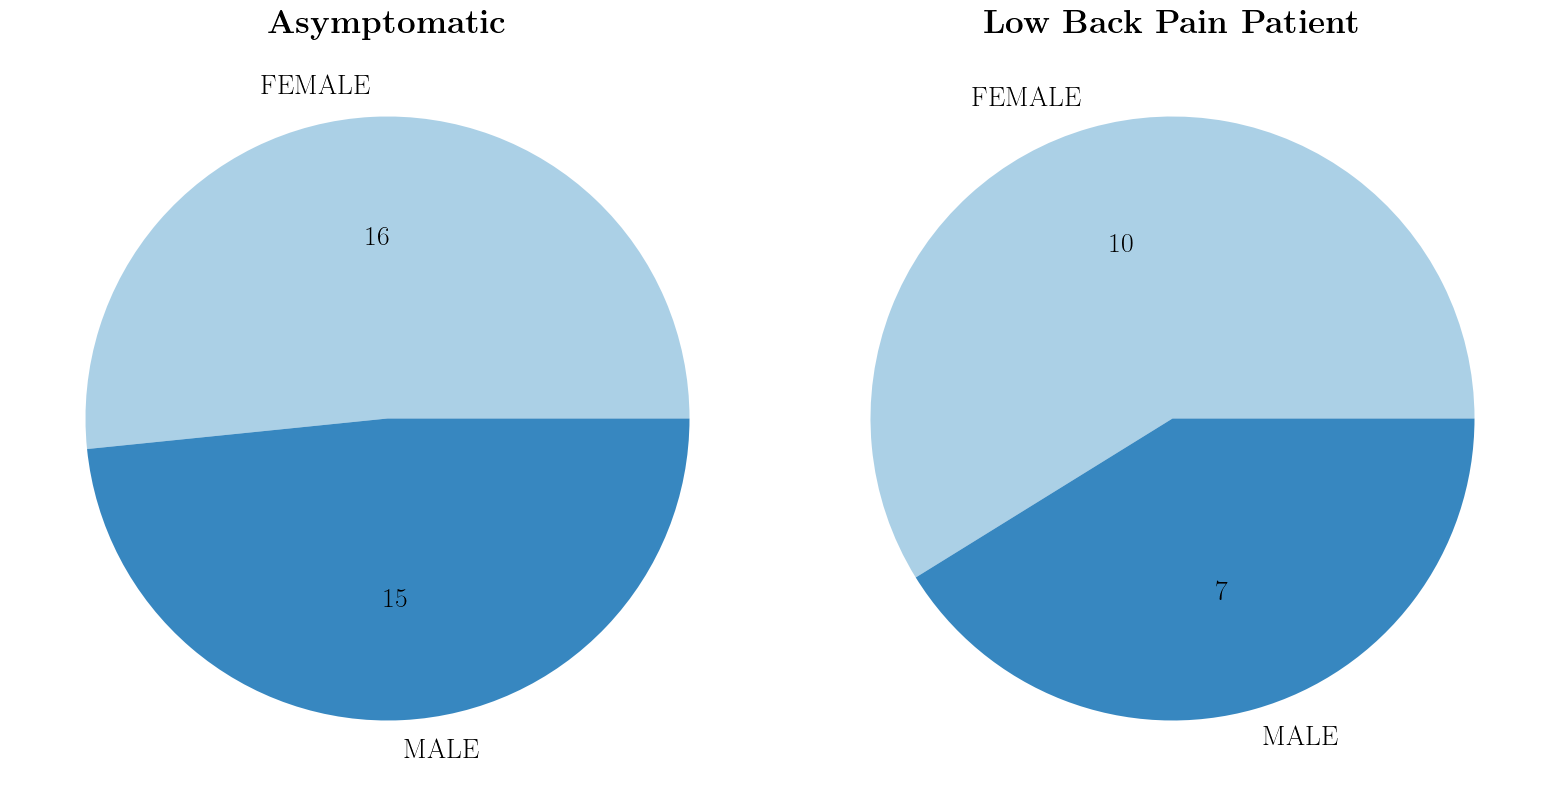

In [27]:
def plot_healthy_patient_pies(data, output_path):
    healthy_data = data[data['Series'] == 'Asymptomatic']
    patient_data = data[data['Series'] == 'Low Back Pain Patient']
    palette = sns.color_palette("Blues", n_colors=2)

    fig, axes = plt.subplots(1, 2, figsize=(16, 9))

    # Function to display raw counts in pie chart
    def plot_pie(ax, group, title):
        category_counts = group['Birth Sex'].value_counts()
        category_counts.plot.pie(
            autopct=lambda p: f'{int(round(p * sum(category_counts) / 100))}', 
            ax=ax, 
            colors=palette,
            labels=category_counts.index,
            textprops={'fontfamily': 'serif', 'fontsize': 20}
        )
        ax.set_ylabel("", fontweight='bold', family='serif')
        ax.set_title(title)

    # Plotting pies
    plot_pie(axes[0], healthy_data,  r"\textbf{Asymptomatic}")
    plot_pie(axes[1], patient_data, r"\textbf{Low Back Pain Patient}")

    plt.tight_layout()
    plt.savefig(os.path.join(output_path, "healthy_patient_pies.png"), bbox_inches='tight', dpi=300)
    plt.show()
plot_healthy_patient_pies(data, output_path)


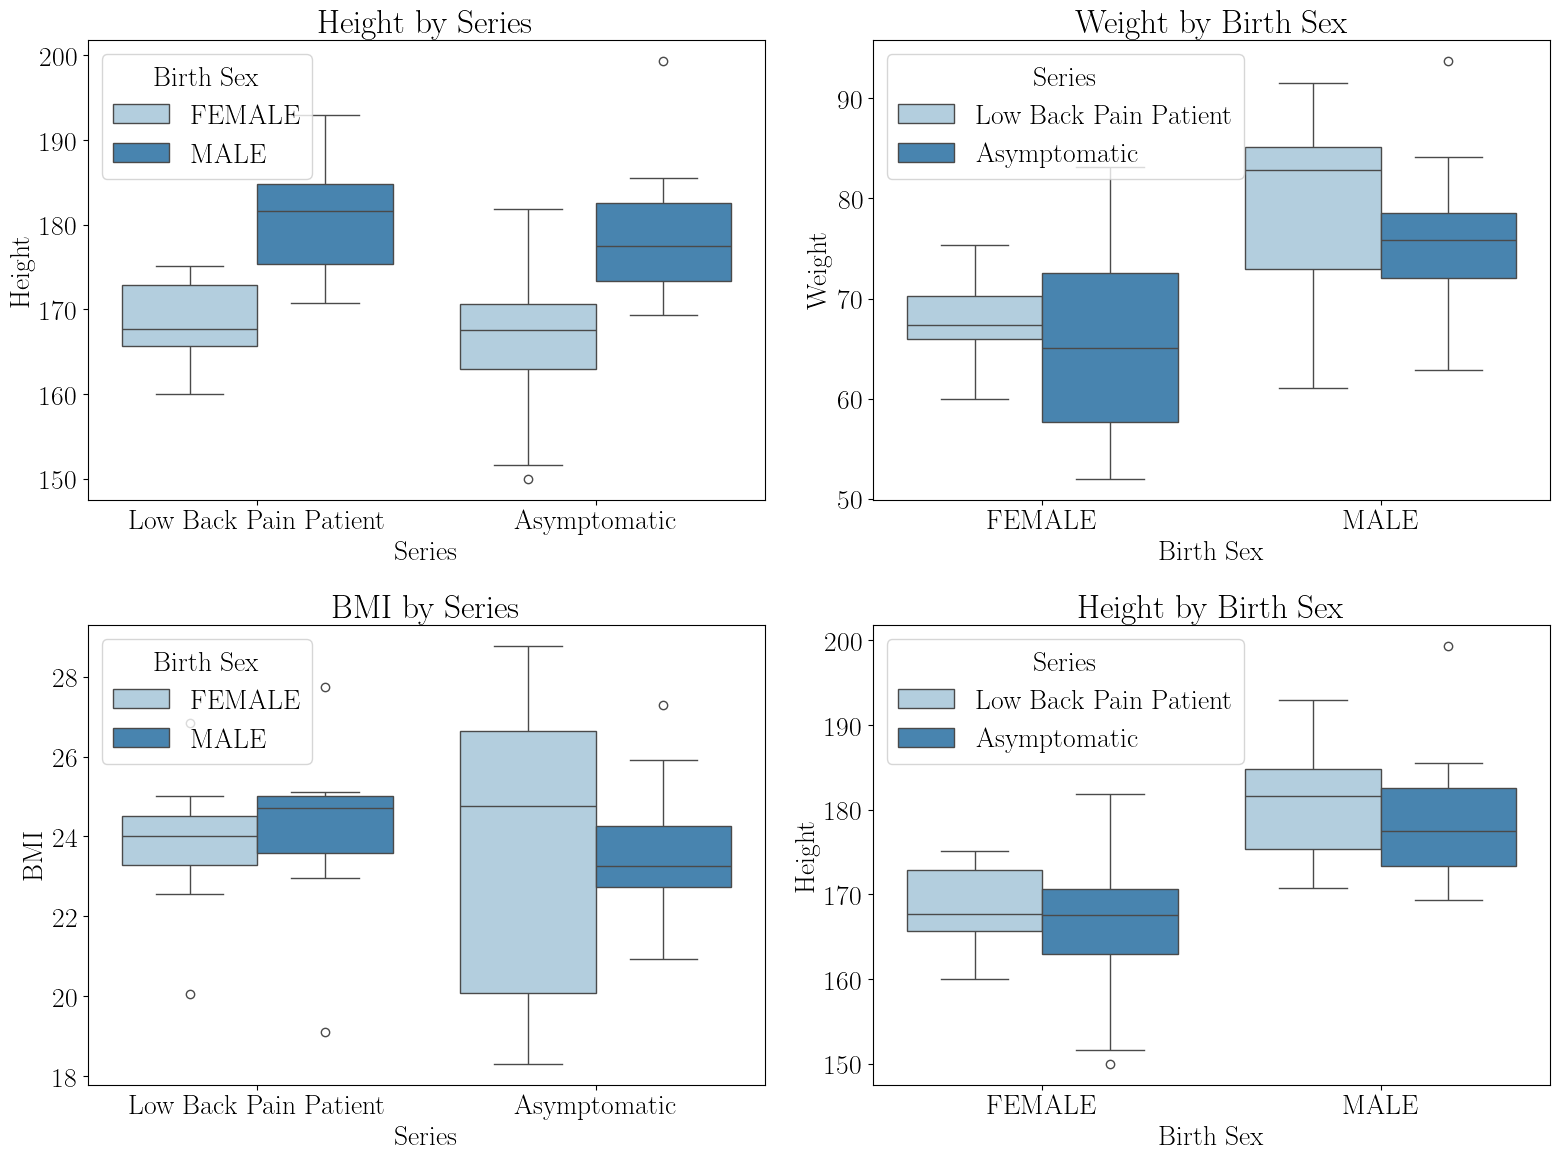

In [28]:
# Function to plot boxplots for comparison
def plot_boxplot_comparisons(data, output_path):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    compare_vars = ['Height', 'Weight', 'BMI']
    categories = ['Series', 'Birth Sex']
    hues = ['Birth Sex','Series', ]
    palette = sns.color_palette("Blues", n_colors=2)
    for i, (var, cat, hue) in enumerate(zip(compare_vars * 2, categories * 2, hues*2)):
        sns.boxplot(data=data, x=cat, y=var, hue=hue, ax=axes.flat[i], palette=palette)
        axes.flat[i].set_title(f"{var} by {cat}")
        axes.flat[i].set_xlabel(cat)
        axes.flat[i].set_ylabel(var)
    
    plt.tight_layout()
    # plt.savefig(os.path.join(output_path, "boxplot_comparisons.png"), bbox_inches='tight', dpi=300)
    plt.show()

plot_boxplot_comparisons(data, output_path)


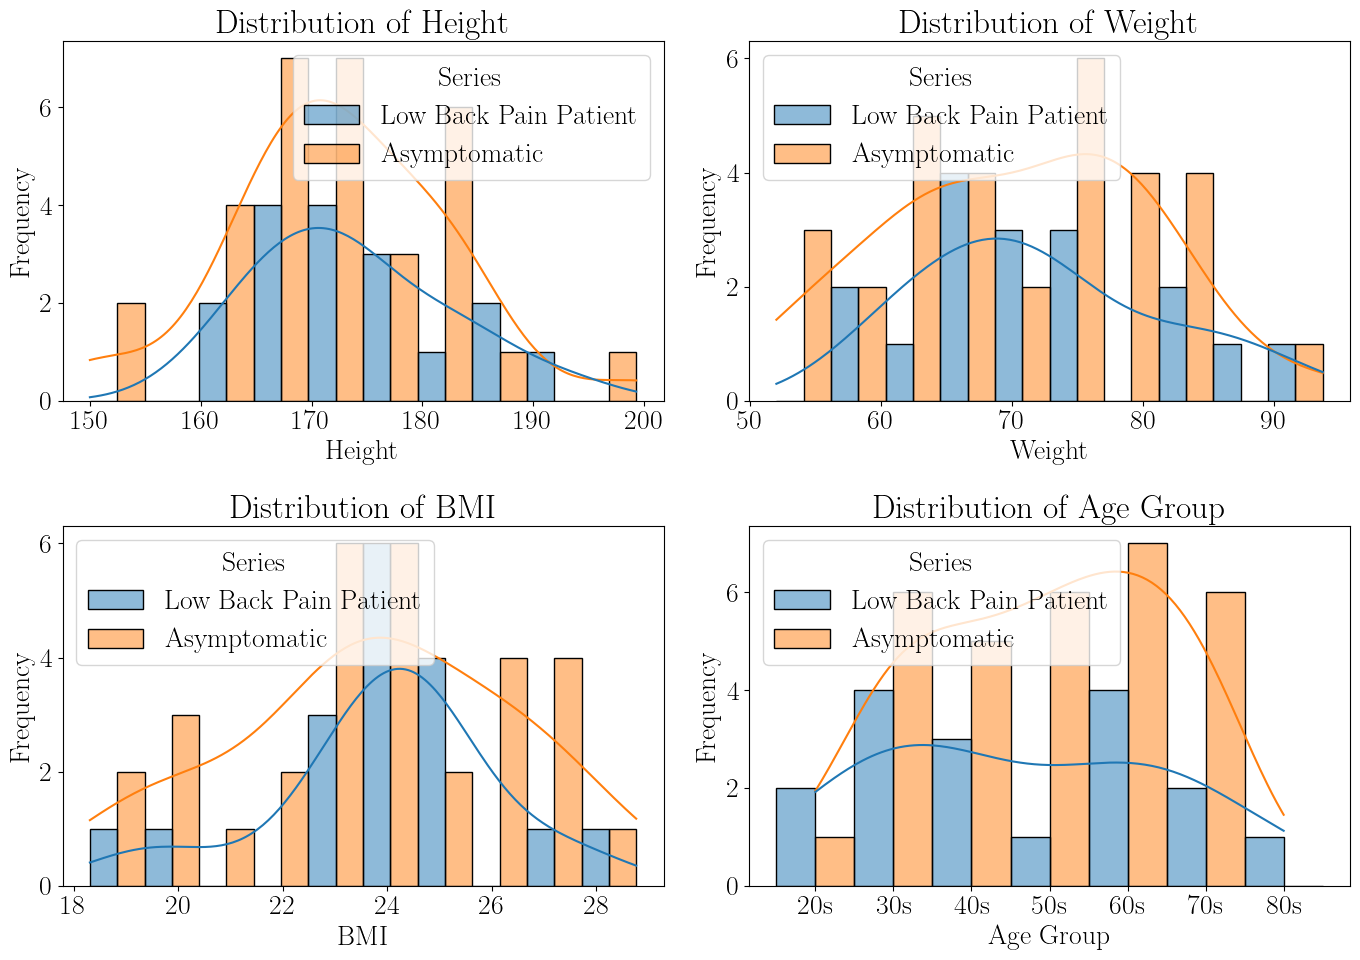

In [29]:

def plot_continuous_distributions(data, output_path):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    continuous_vars = ['Height', 'Weight', 'BMI', 'Age Group']
    palette = sns.color_palette("Blues", n_colors=1)
    for ax, var in zip(axes.flat, continuous_vars):
        sns.histplot(
            data=data,
            x=data[var], 
            kde=True, 
            ax=ax, 
            hue='Series', 
            multiple='dodge',
            bins=10, 
            color=palette[0],
        )
        ax.set_title(f"Distribution of {var}")
        ax.set_xlabel(var)
        ax.set_ylabel("Frequency")
    
    plt.tight_layout()
    # plt.savefig(os.path.join(output_path, "continuous_distributions.png"), bbox_inches='tight', dpi=300)
    plt.show()
plot_continuous_distributions(data, output_path)


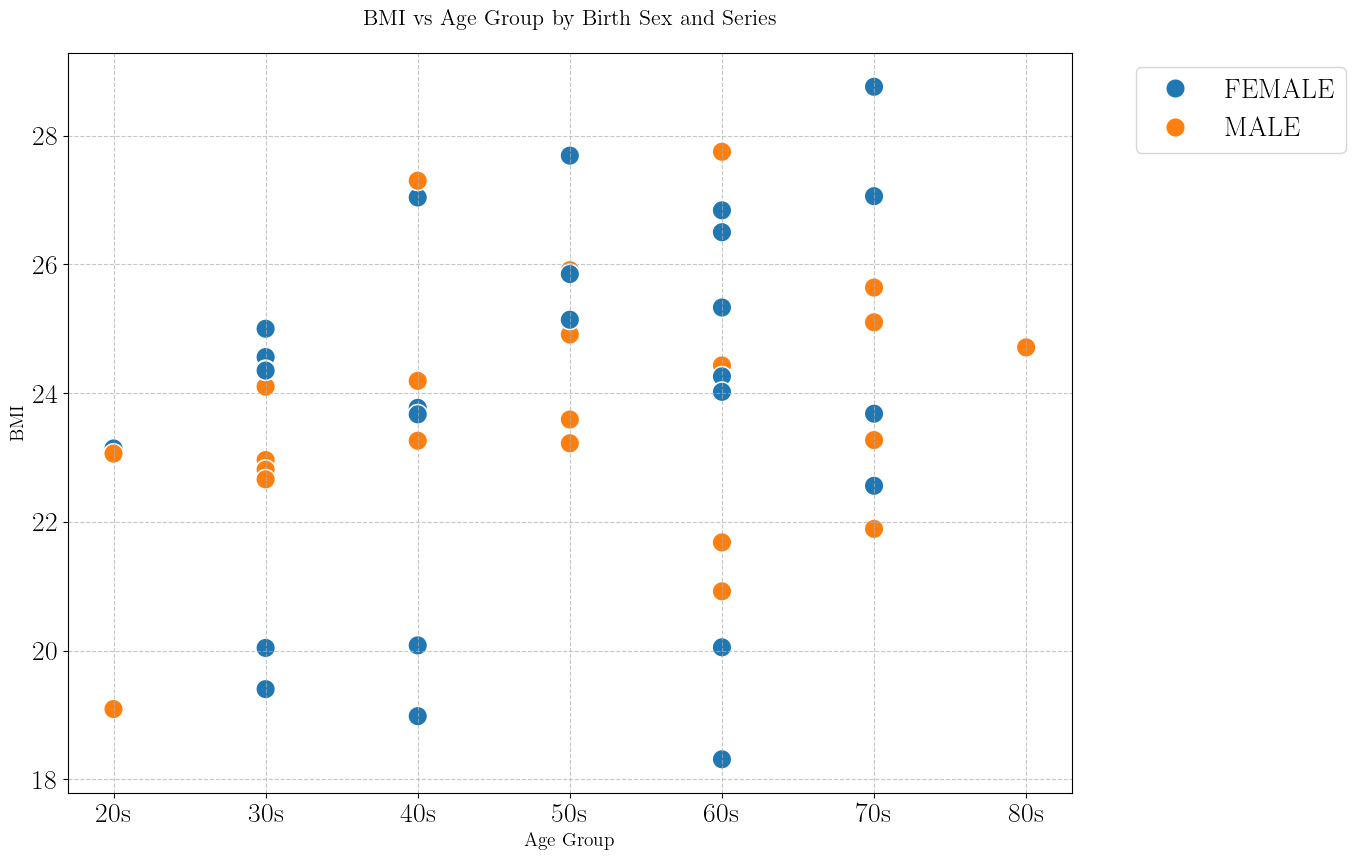

In [30]:

def plot_scatter_plots(data, output_path):
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))
    x = 'Age Group'
    y = 'BMI'
    
    sns.scatterplot(
        data=data, 
        x=x, 
        y=y, 
        hue='Birth Sex', 
        # style='Series', 
        s=200, 
        ax=ax
    )
    
    ax.set_title(f"{y} vs {x} by Birth Sex and Series", fontsize=16, pad=20)
    ax.set_xlabel(x, fontsize=14)
    ax.set_ylabel(y, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, "scatter_plots.png"), bbox_inches='tight', dpi=300)
    plt.show()
plot_scatter_plots(data, output_path)


In [31]:

# Define options for widgets
x_options = ['Series', 'Birth Sex', 'Age at Creation', 'Current Age']
y_options = ['Height', 'Weight', 'BMI']
hue_options = ['Series', 'Birth Sex']
filter_column_options = ['Series', 'Birth Sex', None]

# Default filter values
default_filter_column1 = 'Series'
unique_series = data[default_filter_column1].unique()
default_filter_values1 = unique_series

# Create widgets
x_dropdown = widgets.Dropdown(options=x_options, value='Series', description='X-axis:')
y_dropdown = widgets.Dropdown(options=y_options, value='BMI', description='Y-axis:')
hue_dropdown = widgets.Dropdown(options=hue_options, value='Birth Sex', description='Hue:')
filter_column_dropdown1 = widgets.Dropdown(options=filter_column_options, value=default_filter_column1, description='Filter by:')
filter_values_select1 = widgets.SelectMultiple(options=default_filter_values1, description='Filter Values:', disabled=False)
filter_column_dropdown2 = widgets.Dropdown(options=filter_column_options, value=None, description='Filter by:')
filter_values_select2 = widgets.SelectMultiple(options=[], description='Filter Values:', disabled=True)

# Function to update filter values
def update_filter_values1(change):
    if change['new'] and change['new'] in data.columns:
        unique_values = data[change['new']].unique()
        filter_values_select1.options = unique_values
        filter_values_select1.disabled = False
    else:
        filter_values_select1.options = []
        filter_values_select1.disabled = True

def update_filter_values2(change):
    if change['new'] and change['new'] in data.columns:
        unique_values = data[change['new']].unique()
        filter_values_select2.options = unique_values
        filter_values_select2.disabled = False
    else:
        filter_values_select2.options = []
        filter_values_select2.disabled = True

# Observe changes in filter columns
filter_column_dropdown1.observe(update_filter_values1, names='value')
filter_column_dropdown2.observe(update_filter_values2, names='value')

# Function to update the plot
def update_plot(x, y, hue, filter_column1, filter_values1, filter_column2, filter_values2):
    plot(data, x, y, hue, filter_column1, filter_values1, filter_column2, filter_values2, output_path)

# Layout for widgets
x_dropdown.layout = Layout(width='200px', margin='5px')
y_dropdown.layout = Layout(width='200px', margin='5px')
hue_dropdown.layout = Layout(width='200px', margin='5px')
filter_column_dropdown1.layout = Layout(width='200px', margin='5px')
filter_values_select1.layout = Layout(width='200px', height='100px', margin='5px')
filter_column_dropdown2.layout = Layout(width='200px', margin='5px')
filter_values_select2.layout = Layout(width='200px', height='100px', margin='5px')

# Group widgets
controls_group1 = widgets.HBox([
    widgets.VBox([widgets.HTML('<b>Plot Controls</b>'), x_dropdown, y_dropdown, hue_dropdown])
], layout=Layout(margin='10px'))

controls_group2 = widgets.HBox([
    widgets.VBox([widgets.HTML('<b>Filtering 1</b>'), filter_column_dropdown1, filter_values_select1])
], layout=Layout(margin='10px'))

controls_group3 = widgets.HBox([
    widgets.VBox([widgets.HTML('<b>Filtering 2</b>'), filter_column_dropdown2, filter_values_select2])
], layout=Layout(margin='10px'))

widgets_container = widgets.HBox(
    [controls_group1, controls_group2, controls_group3],
    layout=Layout(
        display='inline-flex',
        flex_flow='row nowrap',
        align_items='flex-start',
        justify_content='space-around',
        width='100%'
    )
)

# Display widgets and interactive output
display(widgets_container)

out = widgets.interactive_output(
    update_plot,
    {
        'x': x_dropdown,
        'y': y_dropdown,
        'hue': hue_dropdown,
        'filter_column1': filter_column_dropdown1,
        'filter_values1': filter_values_select1,
        'filter_column2': filter_column_dropdown2,
        'filter_values2': filter_values_select2
    }
)

display(out)

Output()